# TUNISIA: COVID-19 DATA IN PYTHON
### Data Source

![TUNISIA](https://atalayar.com/sites/default/files/styles/foto_/public/noticias/Atalayar_M%C3%A9dicos%20tunecinos%20coronavirus%20PORTADA.jpg?itok=EE7B__60)


Nurses in Tunisia during the COVID-19 crisis.

### Author Information:
- Laney Snodgrass
- IA 241

The data is downloaded from European Centre for Disease Prevention and Control. Upload the data to an S3 bucket, and import the necessary python libraries.

In [116]:
%matplotlib inline
import pandas

## Import Data from S3 Bucket

In [117]:
df = pandas.read_excel('s3://ia241notebook-spring2022-snodgrass/covid_data.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## List of Unique Countries

In [118]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## Tunisian Data

In [119]:
tunisia_data = df.loc[ df['countriesAndTerritories']=='Tunisia' ]
tunisia_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
56668,14/12/2020,14,12,2020,968,58,Tunisia,TN,TUN,11694721.0,Africa,129.203595
56669,13/12/2020,13,12,2020,1289,35,Tunisia,TN,TUN,11694721.0,Africa,131.794508
56670,2020-12-12 00:00:00,12,12,2020,1290,43,Tunisia,TN,TUN,11694721.0,Africa,131.118989
56671,2020-11-12 00:00:00,11,12,2020,958,41,Tunisia,TN,TUN,11694721.0,Africa,131.161744
56672,2020-10-12 00:00:00,10,12,2020,1411,49,Tunisia,TN,TUN,11694721.0,Africa,132.957426
56673,2020-09-12 00:00:00,9,12,2020,1116,72,Tunisia,TN,TUN,11694721.0,Africa,130.246801
56674,2020-08-12 00:00:00,8,12,2020,327,35,Tunisia,TN,TUN,11694721.0,Africa,129.408816
56675,2020-07-12 00:00:00,7,12,2020,1011,35,Tunisia,TN,TUN,11694721.0,Africa,130.751302
56676,2020-06-12 00:00:00,6,12,2020,1091,45,Tunisia,TN,TUN,11694721.0,Africa,132.709451
56677,2020-05-12 00:00:00,5,12,2020,2620,122,Tunisia,TN,TUN,11694721.0,Africa,133.692800


# 1. The Sum of Case Numbers per Month 

### This section displays the number of COVID-19 cases per month. It is later shown as a line graph.

In [120]:
sum_month = df.groupby('month').sum()['cases']
print(sum_month)

month
1         9799
2        75422
3       723738
4      2339594
5      2891996
6      4249525
7      7067524
8      7963836
9      8456248
10    11949041
11    17134026
12     8642865
Name: cases, dtype: int64


<AxesSubplot:xlabel='month'>

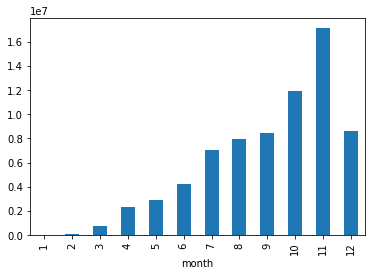

In [121]:
sum_month.plot.bar()

# 2a. Days with the Highest Death Rate

### This section displays the days that has the highest COVID-19 related death rate. It later shows a scatter plot displaying deaths as well as a line chart.

<AxesSubplot:xlabel='cases', ylabel='deaths'>

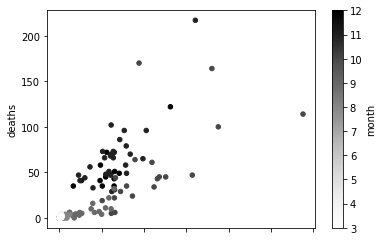

In [122]:
tunisia_data.plot.scatter(x='cases',y='deaths',c='month')

<AxesSubplot:xlabel='dateRep'>

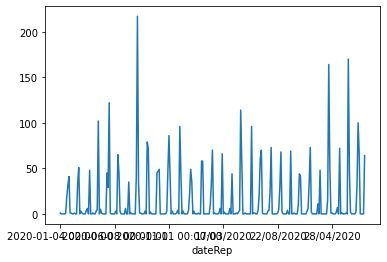

In [123]:
sum_deaths_per_day = tunisia_data.groupby('dateRep').sum()['deaths']
sum_deaths_per_day.plot()

# 2b. Month with the Highest Death Count

### This section displays the month that has the highest COVID-19 related death rate with a bar graph.

In [124]:
month_data = df.groupby('month').sum()['deaths']
month_data.sort_index()
print(month_data)

month
1        213
2       2708
3      35814
4     189180
5     140142
6     134069
7     166195
8     178618
9     162169
10    181054
11    271086
12    151585
Name: deaths, dtype: int64


<AxesSubplot:xlabel='month'>

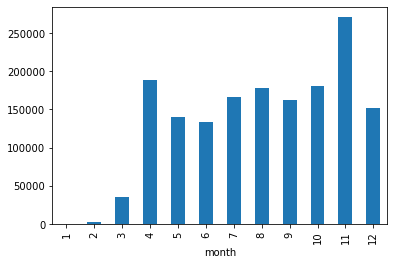

In [125]:
month_data.plot.bar()

In [126]:
month_data = df.groupby('month').sum()['deaths']
print("November has the highest death count at", month_data.max(),"deaths")

November has the highest death count at 271086 deaths


# 2c. Month with the Lowest Death Count

### This section displays the month that has the lowest COVID-19 related death rate with a bar graph.

month
1        213
2       2708
3      35814
4     189180
5     140142
6     134069
7     166195
8     178618
9     162169
10    181054
11    271086
12    151585
Name: deaths, dtype: int64


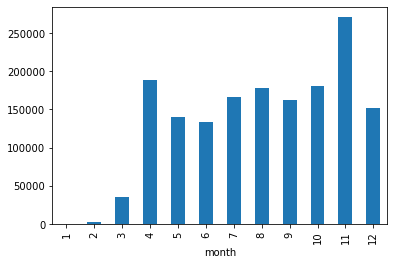

In [127]:
month_data = df.groupby('month').sum()['deaths']
month_data.sort_index()
print(month_data)

month_data.plot.bar()

month_data = df.groupby('month').sum()['deaths']

In [128]:
print("January has the lowest death count at", month_data.min(),"deaths")

January has the lowest death count at 213 deaths


# 3. Mean Number of Cases

### This section displays the mean number of COVID-19 related cases rate with a bar graph.

In [129]:
from statistics import mean

In [130]:
sum_month = df.groupby('month').sum()['cases']
print(sum_month)

month
1         9799
2        75422
3       723738
4      2339594
5      2891996
6      4249525
7      7067524
8      7963836
9      8456248
10    11949041
11    17134026
12     8642865
Name: cases, dtype: int64


In [131]:
def Average(lst):
    return mean(lst)
  
lst = sum_month
average = Average(lst)
  
print("The average number of COVID-19 cases is", round(average, 2))

The average number of COVID-19 cases is 5958634.5


## Conclusion and Limitations:

Tunisia's worst month regarding COVID-19 was November of 2020, while their 'best' was January. We can conclude this is because COVID was not as prevalent at that time. Charts were added to  illustrate the data in a visually appealing way. To improve this project, I would figure out how to stagger the information under 2a's line chart, as I have no idea how to alter charts.